<a href="https://colab.research.google.com/github/Yamurlak1465/LearningAI/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Part** **1**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 features of the flower) ->
  # Hidden Layer 1 (number of neurons) ->
  # Hidden Layer 2 (number of neurons) ->
  # Output (3 classes of Iris flowers)
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() # Instantiate our nn.Model
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [8]:
# Pick a random seed for randomization
torch.manual_seed(41)
# Create an instance of our model
model = Model()

# **Part 2**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [19]:
# Chance last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

In [20]:
# Train, Test, Split!
# Set X,y
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

# Convert these to NumPy Arrays
X = X.values
y = y.values

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [24]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [25]:
# Conver y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [26]:
# Set the criterion of model to measure the error(how far off are the predictions from the data)
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down afte a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [28]:
# Training our model
# Epochs? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error (it's gonna be high at fist)
  loss = criterion(y_pred, y_train) # Predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back through the network to fin tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epochs')

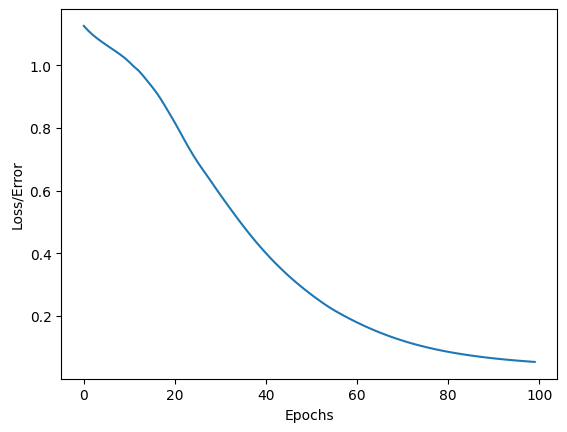

In [30]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel('Epochs')